In [ ]:
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import sklearn
#os.environ["CUDA_VISIBLE_DEVICES"]="0" 

#speed values_2013

data_2013=pd.read_csv("/content/drive/My Drive/Website_data/2013_sw_speed.csv")  ####change location
 #/content/drive/MyDrive/Website_data/2013_sw_speed.csv

#speedvalues
data_y_2013=data_2013[72:4380]
duration_2013=data_y_2013.iloc[:,4].values
data_speed_2013=data_y_2013.iloc[:,3].values 
print(data_y_2013.shape)

#speed values_2014

data_2014=pd.read_csv("/content/drive/My Drive/Website_data/2014_sw_speed.csv")  ####change location
 

#speedvalues
data_y_2014=data_2014[49:4380]
duration_2014=data_y_2014.iloc[:,4].values
data_speed_2014=data_y_2014.iloc[:,3].values 

#speed values_2015

data_2015=pd.read_csv("/content/drive/My Drive/Website_data/sw_speed_2015.csv")  ####change location
 

#speedvalues
data_y_2015=data_2015[49:4380]
duration_2015=data_y_2015.iloc[:,4].values
data_speed_2015=data_y_2015.iloc[:,3].values 



#speed values 2017 
data=pd.read_csv("/content/drive/My Drive/Website_data/solar_wind_latest_2017.csv")  ####change location
 

#speedvalues
data_y_2017=data[49:4380]
duration=data_y_2017.iloc[:,4].values
data_speed=data_y_2017.iloc[:,3].values 

#speed_values_2018
data_2018=pd.read_csv("/content/drive/My Drive/Website_data/sw_speed_2018.csv")  ####change location
 

#speedvalues
data_y_2018=data_2018[49:4380]
data_2018_ac=data_2018.iloc[:,3].values
duration_2018=data_y_2018.iloc[:,4].values
data_speed_2018=data_y_2018.iloc[:,3].values 




#merging all data

train_y1=data_y_2013.append(data_y_2014)
train_y2=train_y1.append(data_y_2015)
train_y3=train_y2.append(data_y_2017)
#train_y1=train_y_inter.append(data_y_2015)

trainy_speed=train_y3.iloc[:,3].values
trainy_speed.shape

(4308, 5)


(17301,)

In [ ]:
#LOading testing data
test_2018=np.load('/content/drive/MyDrive/Website_data/img_full_2018.npy')
test_x1 = test_2018.reshape(test_2018.shape[0], 512,512,1)
test_x=test_x1[0:4331]
print((test_x).shape)

(4331, 512, 512, 1)


In [ ]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)


In [ ]:



#CNN


from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import convolutional
from keras.layers import pooling
from keras.layers import core
from keras import optimizers
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.models import load_model

#model_3=Sequential()
model_8 = Sequential()
model_8.add(convolutional.Convolution2D(32, (9,9),strides=(3, 3), input_shape=(512,512,1)))
model_8.add(Activation('relu'))
model_8.add(pooling.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_8.add(convolutional.Convolution2D(64, (2,2),strides=(2, 2)))
model_8.add(Activation('relu'))
model_8.add(pooling.MaxPooling2D(pool_size=(3, 3),strides=(2, 2)))
model_8.add(convolutional.Convolution2D(128, (2,2),strides=(2, 2)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(pooling.MaxPooling2D(pool_size=(3, 3),strides=(1, 1)))
model_8.add(Flatten())
model_8.add(Dense(4096,activation='relu'))
model_8.add(core.Dropout(.3))
model_8.add(Dense(1,activation='linear'))
model_8.compile(optimizer=tf.optimizers.Adam(lr=1e-04), loss='mse',metrics=['mse'])
print(model_8.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 168, 168, 32)      2624      
                                                                 
 activation (Activation)     (None, 168, 168, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        8256      
                                                                 
 activation_1 (Activation)   (None, 42, 42, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.models import load_model
model_8.load_weights('/content/drive/My Drive/Website_data/train_weights_183l_frgb.h5')

In [ ]:
#y_mean_100=pd.read_csv('/content/drive/My Drive/Website_data/mean_100_models.csv')

#mean_pred1=np.mean(y_mean_100,axis=0)
#std_pred1=np.std(y_mean_100,axis=0)#

In [ ]:
import pandas as pd
import numpy as np
y_test1=pd.read_csv('/content/drive/My Drive/Website_data/y_test1.csv')
y_test1=np.array(y_test1).reshape(4331,)

In [ ]:
#3prediction
y_predicted=model_8.predict(test_x)

In [ ]:
y_predicted=np.array(y_predicted).reshape(4331,)

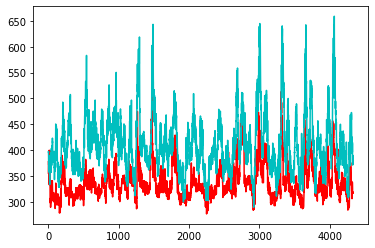

In [ ]:
plt.plot(y_predicted,color='r')
plt.plot(y_test1,color='c')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_predicted,y_test1))
print(rmse)

83.28428537014695
